# Basic neural network

using the famous iris dataset: https://archive.ics.uci.edu/dataset/53/iris

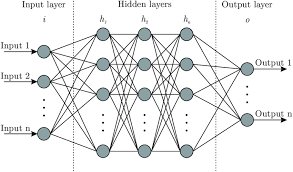

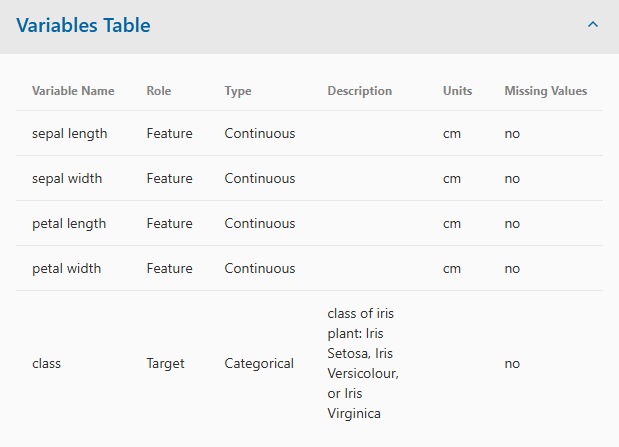

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import kagglehub
path = kagglehub.dataset_download("uciml/iris")

# create a model class that inherits the nn.Module

# Workflow
# input layer (features of flowers) --->
# hidden layer1 (number of neurons) --->
# H2 (n) --->
# output layer (3 classes of iris flowers)

class Model(nn.Module):
    def __init__(self,input_features=4, h1=8, h2=10,output_features=3):
        super().__init__() #instantiate nn.Module

        # these 3 lines of code declares 3 layers of the neural networks
        self.fc1 = nn.Linear(input_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,output_features)

    #
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# picking manual seed for randomization
torch.manual_seed(1)
# create an instance of our model
model = Model()

url = path+"/Iris.csv"
df = pd.read_csv(url)

# iris setosa = 0, iris versicolor = 1, iris virginica = 2
# basically changing all the str to int so our model can work with it easily
df["Species"] = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,
                'Iris-virginica':2}).infer_objects(copy=False).astype(int)

# Train, test, and split. set x and y
x = df.drop(['Species', 'Id'],axis=1).values # Drop 'Id' column as it's not a feature
y = df['Species'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# convert x features to float tensors = can float or int
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# convert y labels to long tensor = can only int
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# set the criterion to measure error, calculate predictions accurracy
criterion = nn.CrossEntropyLoss()
# lr = learning rate. the lower, the longer the time it takes to learn datasets
# epochs = iterations
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# train our model (YAYAYAYAy this is what ive been waiting for)
epochs = 150
losses = []

for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred,y_train) # predicted value vs the actual y_train value
    losses.append(loss.detach().numpy()) # keep track of the losses

    # every 10 epochs, print
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    # sum backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




Using Colab cache for faster access to the 'iris' dataset.
Epoch: 0 Loss: 1.1503818035125732
Epoch: 10 Loss: 0.9194084405899048
Epoch: 20 Loss: 0.704123854637146
Epoch: 30 Loss: 0.49832883477211
Epoch: 40 Loss: 0.35536232590675354
Epoch: 50 Loss: 0.2585354745388031
Epoch: 60 Loss: 0.17496448755264282
Epoch: 70 Loss: 0.1193605437874794
Epoch: 80 Loss: 0.0912778452038765
Epoch: 90 Loss: 0.07814262807369232
Epoch: 100 Loss: 0.07162554562091827
Epoch: 110 Loss: 0.06804760545492172
Epoch: 120 Loss: 0.0658479630947113
Epoch: 130 Loss: 0.06435101479291916
Epoch: 140 Loss: 0.06324109435081482


In [4]:
# for printing the table

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


In [ ]:
# evaluate model on test dataset
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval,y_test)

print(loss)


tensor(0.0419)


In [ ]:

correct=0
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val = model.forward(data)


        # decide which species of iris the model thinks
        print(f'{i+1:2}. {str(y_val):38} {y_test[i]} \t { y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([ 10.3995,  -0.0570, -17.1376]) 0 	 0
 2. tensor([ 0.1831,  4.0012, -5.2084])    1 	 1
 3. tensor([-2.9045,  5.0041, -2.2776])    1 	 1
 4. tensor([  9.3239,   0.3351, -15.7038]) 0 	 0
 5. tensor([-8.2178,  3.2263,  5.4488])    2 	 2
 6. tensor([-4.5082,  4.0109,  0.5596])    1 	 1
 7. tensor([-7.6009,  2.6708,  5.3934])    2 	 2
 8. tensor([  7.7713,   1.1369, -13.8769]) 0 	 0
 9. tensor([  7.6734,   0.8508, -13.4151]) 0 	 0
10. tensor([-9.2838,  1.8503,  8.1278])    2 	 2
11. tensor([-3.6995,  3.9106, -0.2026])    1 	 1
12. tensor([  8.5680,   0.8312, -14.9234]) 0 	 0
13. tensor([-9.1949,  2.0399,  7.8237])    2 	 2
14. tensor([-3.5556,  4.5581, -1.0788])    1 	 1
15. tensor([-4.4945,  3.7701,  0.8132])    1 	 1
16. tensor([  7.9216,   0.4901, -13.4678]) 0 	 0
17. tensor([-2.6123,  4.5915, -2.1353])    1 	 1
18. tensor([-4.8994,  3.3189,  1.7519])    1 	 1
19. tensor([  8.4447,   0.8145, -14.6954]) 0 	 0
20. tensor([  8.7478,   0.3434, -14.7282]) 0 	 0
21. tensor([-4.2270,

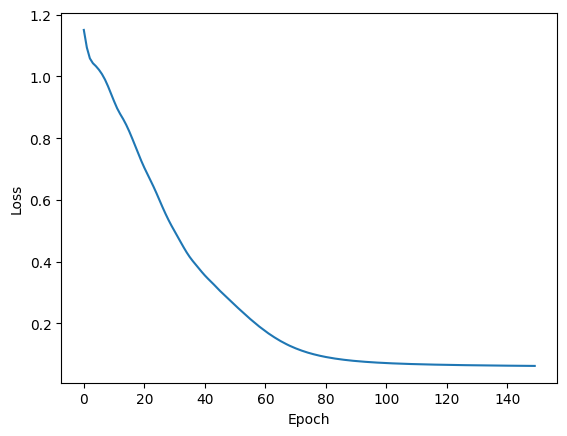

In [7]:
# data plotting

plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [5]:
# using new data to test
new_data = torch.Tensor([4.8,3.9,1.2,0.1])

with torch.no_grad():
    print(model(new_data)) # the biggest number is what ai thinks the data is
    print(model(new_data).argmax())

    # argmax() returns tensor with the surest ai guess (biggest number)
    # argmin() returns tensor with the least guess (smallest number)
    # using argmax().item() we can get the integer, not tensor

tensor([  9.4180,  -0.0762, -15.4410])
tensor(0)


In [10]:
# saving our NNmodel

torch.save(model.state_dict(),'iris_identification_model.pth')



In [11]:
# loading our model
model2 = Model()
model2.load_state_dict(torch.load('iris_identification_model.pth'))

<All keys matched successfully>

In [12]:
model2.eval()  # set the model to evaluation mode

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)